<h1 style="text-align: center;"> FINAL PROJECT </h1>
<h2 style="text-align: center;"> Dự đoán điểm IT001 từ dữ liệu làm bài trên WECODE </h2>

---

#### Lớp: CS114.P21

#### Thành viên nhóm

1. Nguyễn Chí Cường - 23520199
2. Hứa Mạnh Tân - 23521396
3. Nguyễn Tấn Tài - 23521376

#### MỤC LỤC

---

## 1. Chuẩn bị dữ liệu và một số thông tin về bộ dữ liệu

### 1.1. Import thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 1.2. Load bộ dữ liệu

In [2]:
# Đường dẫn đến các tập dữ liệu
WECODE_DATASET = "../dataset/wecode/annonimized.csv"
SCORE_DATASET = "../dataset/wecode/th-public.csv"

In [3]:
wecode_df = pd.read_csv(WECODE_DATASET).rename(
    columns={
        "concat('it001',`assignment_id`)": "assignment_id",
        "concat('it001',`problem_id`)": "problem_id",
        "concat('it001', username)": "username",
        "concat('it001',`language_id`)": "language_id",
    }
)

score_df = (
    pd.read_csv(SCORE_DATASET)
    .rename(columns={"hash": "username", "TH": "score"})
    .replace(r"^\s*$", "", regex=True)
)

### 1.3. Thông tin bộ dữ liệu

#### 1.3.1. Thông tin bộ dữ liệu làm bài tập Wecode của sinh viên

In [4]:
wecode_df.head(10)

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
5,90ce27571176d87961b565d5ef4b3de33ede04ac,d6a5bdd7f7f32364f4743854ef3b5369c0706677,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:29:03,10-09 09:30:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
6,90ce27571176d87961b565d5ef4b3de33ede04ac,d6a5bdd7f7f32364f4743854ef3b5369c0706677,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:29:58,10-09 09:30:08,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
7,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:32:17,10-09 09:42:54,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd..."
8,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:33:36,10-09 09:33:36,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd..."
9,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:34:05,10-09 09:34:05,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd..."


In [5]:
wecode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   assignment_id  295198 non-null  object
 1   problem_id     295198 non-null  object
 2   username       295198 non-null  object
 3   is_final       295198 non-null  int64 
 4   status         295198 non-null  object
 5   pre_score      295198 non-null  int64 
 6   coefficient    295198 non-null  int64 
 7   language_id    295198 non-null  object
 8   created_at     295198 non-null  object
 9   updated_at     295198 non-null  object
 10  judgement      295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [6]:
wecode_df.nunique()

assignment_id       203
problem_id          469
username           1489
is_final              2
status                4
pre_score           631
coefficient           4
language_id           6
created_at       284530
updated_at       242976
judgement         58406
dtype: int64

Từ thông tin trên thì ta có thể nhận thấy ngay bộ dữ liệu không hề có cột nào bị bỏ trống (tất cả các cột đều có 295198 giá trị là non-null), nên ta không cần phải xử lí dữ liệu khuyết thiết cho dữ liệu này. 

Những ta dễ thấy, các đặc trưng của dữ liệu này không mang giá trị đánh giá chung về khả năng của sinh viên, mà nó chỉ chứa thông tin về những lần nộp bài wecode của sinh viên một các rời rạc, lẻ tẻ. Vì vậy, chúng cần phải được tổng hợp lại và thay thế bằng những đặc trưng mới có giá trị đánh giá hoạt động học tập của sinh viên (ví dụ: tổng điểm của các bài wecode, số lần thử nộp bài, số bài đã giải, ...). Và từ đó ta có thể xây dựng các mô hình dự đoán điểm quá trình, thực hành và cuối kì dựa trên các đặc trưng mới này hiệu quả hơn.

#### 1.3.2. Thông tin bộ dữ liệu điểm của sinh viên

In [7]:
score_df.head(10)

,username,score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,6
5,0155f91fe242fe55e1af631b0f0afbe9938b185c,7.5
6,016f87a7bd87f233a8633fba8a1ca7ef5c3c63c1,8
7,017ec1bbad0d598e5a86ac3bd595b870b6456e61,8.5
8,01ad03ec301749c033155fc17e657cc767d447c8,7.5
9,020ef1c31cb4751bbfa1a88fba782db3c402e2fa,5.5


In [8]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  761 non-null    object
 1   score     755 non-null    object
dtypes: object(2)
memory usage: 12.0+ KB


In [9]:
score_df.nunique()

username    761
score        21
dtype: int64

## 2. Trích xuất đặc trưng từ dữ liệu gốc để tạo dữ liệu mới

### 2.1. Trích xuất đặc trưng

Như đã phân tích ở phần 1 thì tập dữ liệu wecode hiện tại không thể được dùng trực tiếp để đánh giá năng lực học tập của sinh viên. Nó là một bản ghi log thông tin các lần nộp bài của sinh viên trên wecode. Do đó, cần phải tổng hợp các đặc trưng hiện tại và trích xuất ra thành các đặt trưng mới có giá trị đánh giá năng lực học tập của sinh viên hơn.

Từ tập dữ liệu wecode trên, một số đặc trưng mới có thể trích xuất từ các đặc trưng hiện tại có thể kể đến đó là:
- Tổng số lần nộp bài (`submissions`)
- Tổng số lần thử đúng (`correct_submissions`)
- Tổng số vấn đề đã thử giải (`tried_problems`)
- Tổng số vấn đề đã giải (`solved_problems`)
- Tổng điểm của tất cả các lần nộp (`total_submissions_score`)
- Tổng điểm cuối cùng (`total_final_score`)

In [10]:
import json

# Giả sử bạn đã đọc file CSV:
# wecode_df = pd.read_csv("submissions.csv")

# Bước 1: Tiền xử lý thời gian
wecode_df["created_at"] = pd.to_datetime(
    wecode_df["created_at"], format="%m-%d %H:%M:%S", errors="coerce"
)
wecode_df["updated_at"] = pd.to_datetime(
    wecode_df["updated_at"], format="%m-%d %H:%M:%S", errors="coerce"
)
wecode_df["submit_date"] = wecode_df["created_at"].dt.date

# Bước 2: Thời gian hoạt động mỗi lần nộp
wecode_df["active_duration"] = (
    wecode_df["updated_at"] - wecode_df["created_at"]
).dt.total_seconds()


# Bước 3: Cờ đánh dấu judgement > 0
def is_judgement_nonzero(j):
    try:
        data = json.loads(j)
        total = sum(sum(v) for v in data.values() if isinstance(v, list))
        return total > 0
    except:
        return False


wecode_df["judgement_nonzero"] = wecode_df["judgement"].apply(is_judgement_nonzero)

# Bước 4: Tính các đặc trưng

# Tổng số lần nộp
submit_counts = wecode_df.groupby("username").size().rename("total_submissions")

# Số problem tham gia
problem_counts = (
    wecode_df.groupby("username")["problem_id"].nunique().rename("num_problems")
)

# Số assignment tham gia
assignment_counts = (
    wecode_df.groupby("username")["assignment_id"].nunique().rename("num_assignments")
)

# Số ngày hoạt động
active_days = (
    wecode_df.groupby("username")["submit_date"].nunique().rename("active_days")
)

# Tính điểm có trọng số cho mỗi lần nộp
wecode_df["weighted_score"] = wecode_df["pre_score"] * wecode_df["coefficient"]
# Tính tổng điểm có trọng số theo username
total_weighted_score = (
    wecode_df.groupby("username")["weighted_score"].sum().rename("total_weighted_score")
)

# Tổng pre_score
total_prescore = (
    wecode_df.groupby("username")["pre_score"].sum().rename("total_prescore")
)

# Số problem với is_final = 1
final_problem = (
    wecode_df[wecode_df["is_final"] == 1]
    .groupby("username")["problem_id"]
    .nunique()
    .rename("num_final_problems")
)

# Số problem với is_final = 1 và pre_score=10000
final_problem_prescore = (
    wecode_df[(wecode_df["is_final"] == 1) & (wecode_df["pre_score"] == 10000)]
    .groupby("username")["problem_id"]
    .nunique()
    .rename("num_final_prescore_problems")
)


# Số problem có pre_score < 10000
low_score_problem = (
    wecode_df[wecode_df["pre_score"] < 10000]
    .groupby("username")["problem_id"]
    .nunique()
    .rename("num_low_score_problems")
)

# Tổng số lần nộp có judgement > 0
nonzero_judgement_submissions = (
    wecode_df[wecode_df["judgement_nonzero"]]
    .groupby("username")
    .size()
    .rename("nonzero_judgement_submissions")
)
# Tổng thời gian hoạt động mỗi ngày (cho mỗi username và ngày cụ thể)
daily_time = wecode_df.groupby(["username", "submit_date"])["active_duration"].sum()

# Sau đó tính trung bình theo từng username
avg_time_per_day = daily_time.groupby("username").mean().rename("avg_time_per_day")


# Lọc ra những lần nộp đạt yêu cầu
final_10000 = wecode_df[
    (wecode_df["is_final"] == 1) & (wecode_df["pre_score"] == 10000)
]
# Lấy bài nộp đầu tiên theo (username, problem_id)
first_submits = final_10000.sort_values("created_at").drop_duplicates(
    subset=["username", "problem_id"], keep="first"
)
# Đếm số lượng problem khác nhau thỏa điều kiện theo từng username (nộp lần đầu đc full điểm -> có thể giỏi hoặc được bạn gửi bài)
n_problems_first10000 = (
    first_submits.groupby("username")["problem_id"]
    .nunique()
    .rename("n_problems_first10000")
)

# thời gian trung bình cho mỗi bài đạt yêu cầu đó (lọc những sinh viên lấy bài bạn nộp)
avg_duration_per_problem = (
    first_submits.groupby("username")["active_duration"]
    .mean()
    .rename("avg_duration_per_problem")
)

# final=1 ,status=score, pre_score=10000(Sinh viên đã luyện tập hoặc giải tốt được bao nhiêu bài khác nhau đa dạng kiến thức)
final_prescore_status = (
    wecode_df[
        (wecode_df["is_final"] == 1)
        & (wecode_df["pre_score"] == 10000)
        & (wecode_df["status"] == "SCORE")
    ]
    .groupby("username")["problem_id"]
    .nunique()
    .rename("final_prescore_status")
)

# thể hiện sinh viên đã nộp bao nhiêu lần thành công (kiên trì luyện tập)
final_prescore_status1 = (
    wecode_df[
        (wecode_df["is_final"] == 1)
        & (wecode_df["pre_score"] == 10000)
        & (wecode_df["status"] == "SCORE")
    ]
    .groupby("username")
    .size()
    .rename("final_prescore_status1")
)
# Bước 5: Gộp tất cả các đặc trưng
extracted_wecode_df = (
    pd.concat(
        [
            submit_counts,
            problem_counts,
            assignment_counts,
            active_days,
            total_prescore,
            final_problem,
            low_score_problem,
            nonzero_judgement_submissions,
            total_weighted_score,
            # avg_time_per_day,
            n_problems_first10000,
            # avg_duration_per_problem,
            final_problem_prescore,
            final_prescore_status,
            final_prescore_status1,
        ],
        axis=1,
    )
    .fillna(0)
    .reset_index()
)

extracted_wecode_df

/tmp/ipykernel_323796/2244093976.py:7: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  wecode_df["created_at"] = pd.to_datetime(


,username,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,n_problems_first10000,num_final_prescore_problems,final_prescore_status,final_prescore_status1
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,7,14,809110,45.0,27.0,16.0,80911000,45.0,45.0,45.0,46.0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,9,20,1421535,78.0,46.0,29.0,142153500,72.0,72.0,72.0,72.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,66,7,25,1164882,65.0,29.0,34.0,116488200,58.0,58.0,58.0,59.0
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,4,13,595276,47.0,17.0,7.0,59527600,47.0,47.0,47.0,47.0
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,52,8,8,692766,52.0,19.0,14.0,68680200,44.0,44.0,44.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,34,9,7,413000,34.0,13.0,0.0,41300000,34.0,34.0,34.0,34.0
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,77,6,16,1613185,77.0,39.0,10.0,161318500,74.0,74.0,74.0,75.0
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,100,6,48,2184330,100.0,58.0,49.0,218433000,99.0,99.0,99.0,102.0
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,34,7,7,408273,34.0,21.0,8.0,40827300,30.0,30.0,30.0,30.0


### 2.2. Hợp nhất tập dữ liệu điểm và tập dữ liệu wecode để hình thành tập dữ liệu đầy đủ để huấn luyện và kiểm tra mô hình

In [11]:
data_df = pd.merge(
    extracted_wecode_df,
    score_df,
    on="username",
    how="inner",
)
data_df.head(10)

,username,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,n_problems_first10000,num_final_prescore_problems,final_prescore_status,final_prescore_status1,score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,7,14,809110,45.0,27.0,16.0,80911000,45.0,45.0,45.0,46.0,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,9,20,1421535,78.0,46.0,29.0,142153500,72.0,72.0,72.0,72.0,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,66,7,25,1164882,65.0,29.0,34.0,116488200,58.0,58.0,58.0,59.0,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,52,8,8,692766,52.0,19.0,14.0,68680200,44.0,44.0,44.0,58.0,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,90,9,22,1042765,90.0,45.0,4.0,104276500,79.0,79.0,79.0,79.0,6
5,0155f91fe242fe55e1af631b0f0afbe9938b185c,179,46,8,10,836531,46.0,31.0,7.0,82653100,42.0,42.0,42.0,56.0,7.5
6,016f87a7bd87f233a8633fba8a1ca7ef5c3c63c1,364,78,10,29,1774884,77.0,54.0,44.0,177488400,68.0,68.0,68.0,68.0,8
7,017ec1bbad0d598e5a86ac3bd595b870b6456e61,218,91,11,17,1380711,91.0,39.0,19.0,138071100,85.0,85.0,85.0,85.0,8.5
8,01ad03ec301749c033155fc17e657cc767d447c8,271,72,12,24,1404394,72.0,42.0,32.0,140439400,67.0,67.0,67.0,68.0,7.5
9,020ef1c31cb4751bbfa1a88fba782db3c402e2fa,175,62,7,23,1175106,62.0,33.0,19.0,117510600,58.0,58.0,58.0,71.0,5.5


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   username                       761 non-null    object 
 1   total_submissions              761 non-null    int64  
 2   num_problems                   761 non-null    int64  
 3   num_assignments                761 non-null    int64  
 4   active_days                    761 non-null    int64  
 5   total_prescore                 761 non-null    int64  
 6   num_final_problems             761 non-null    float64
 7   num_low_score_problems         761 non-null    float64
 8   nonzero_judgement_submissions  761 non-null    float64
 9   total_weighted_score           761 non-null    int64  
 10  n_problems_first10000          761 non-null    float64
 11  num_final_prescore_problems    761 non-null    float64
 12  final_prescore_status          761 non-null    flo

## 3. Phân tích dữ liệu

### Tính toán correlation

/tmp/ipykernel_323796/2403019010.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")


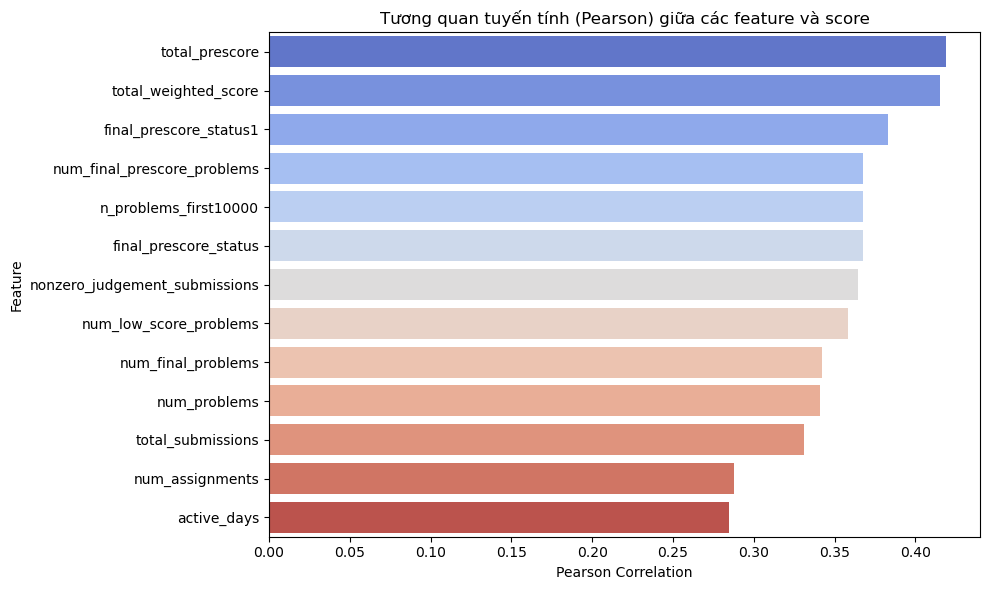

In [13]:
data_df["score"] = pd.to_numeric(data_df["score"], errors="coerce")


corr = (
    data_df.drop(columns=["username", "score"])
    .corrwith(data_df["score"], numeric_only=True)
    .sort_values(ascending=False)
)


plt.figure(figsize=(10, 6))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("Tương quan tuyến tính (Pearson) giữa các feature và score")
plt.xlabel("Pearson Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

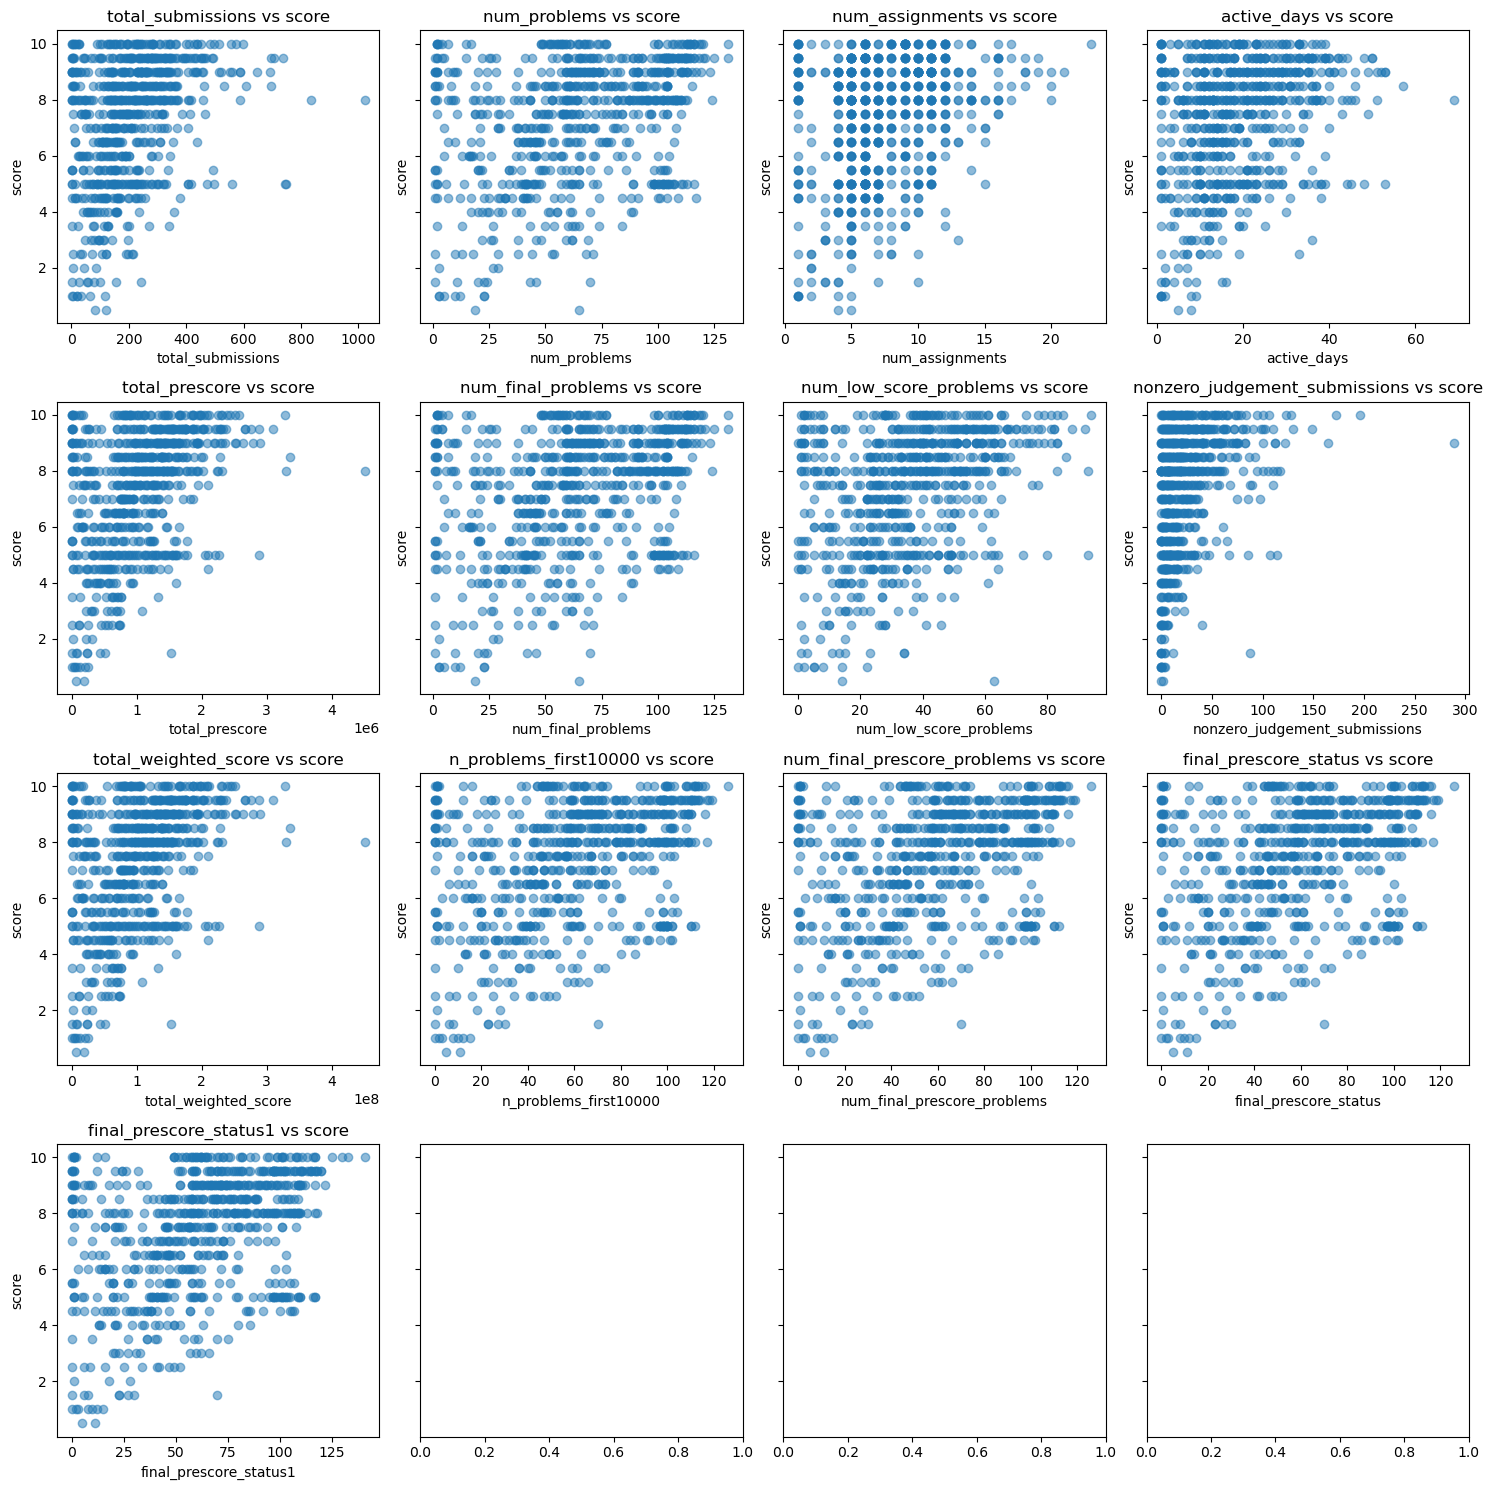

In [14]:
fig, axes = plt.subplots(
    4,
    (len(data_df.columns) - 2) // 3,
    figsize=(15, 15),
    sharey=True,
)

for i, feature_col in enumerate(data_df.columns[1:-1]):
    axes[i // 4, i % 4].scatter(data_df[feature_col], data_df["score"], alpha=0.5)
    axes[i // 4, i % 4].set_title(f"{feature_col} vs {"score"}")
    axes[i // 4, i % 4].set_xlabel(feature_col)
    axes[i // 4, i % 4].set_ylabel("score")

plt.tight_layout()
plt.show()

## 4. Tiền xử lí dữ liệu

### 4.1. Xử lí dữ liệu khuyết thiếu và tách tập train, test

In [15]:
data_df = data_df.dropna()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 0 to 760
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   username                       753 non-null    object 
 1   total_submissions              753 non-null    int64  
 2   num_problems                   753 non-null    int64  
 3   num_assignments                753 non-null    int64  
 4   active_days                    753 non-null    int64  
 5   total_prescore                 753 non-null    int64  
 6   num_final_problems             753 non-null    float64
 7   num_low_score_problems         753 non-null    float64
 8   nonzero_judgement_submissions  753 non-null    float64
 9   total_weighted_score           753 non-null    int64  
 10  n_problems_first10000          753 non-null    float64
 11  num_final_prescore_problems    753 non-null    float64
 12  final_prescore_status          753 non-null    float64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    data_df.drop(columns=["username", "score"]),
    data_df["score"],
    test_size=0.1,
    random_state=42,
)

### 4.2. Xử lí chuẩn hóa dữ liệu

In [17]:
scaler = StandardScaler()

for col in X_train.columns:
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])
    extracted_wecode_df[col] = scaler.transform(extracted_wecode_df[[col]])

In [18]:
X_train.head(10)

,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,n_problems_first10000,num_final_prescore_problems,final_prescore_status,final_prescore_status1
685,-0.334488,-0.121526,0.915730,0.534241,-0.046391,-0.117615,0.066717,-0.149332,-0.041776,-0.026705,-0.026705,-0.026705,0.196762
77,-0.457381,-0.182900,0.125650,-0.071880,-0.330970,-0.179031,-0.340199,-0.079076,-0.326628,-0.152256,-0.152256,-0.152256,-0.201789
711,-0.392320,-0.367024,0.389010,-0.504824,-0.340215,-0.363278,-0.289334,-0.149332,-0.413845,-0.403358,-0.403358,-0.403358,0.012816
73,-1.483899,-1.932080,-1.717868,-1.543889,-1.615232,-1.929380,-1.713540,-0.851888,-1.612120,-1.878580,-1.878580,-1.878580,-1.887968
220,-1.173052,-1.226270,-1.191149,-1.024356,-1.242408,-1.253807,-1.357488,-0.746505,-1.238938,-1.282214,-1.282214,-1.282214,-1.305470
592,-0.804373,-0.704585,-0.137710,-0.158469,-0.647088,-0.701065,-0.797979,-0.500610,-0.643048,-0.591684,-0.591684,-0.591684,-0.630998
167,-1.346548,-1.778643,-1.454509,-1.197534,-1.444702,-1.775841,-1.459217,-0.781632,-1.441426,-1.815805,-1.815805,-1.815805,-1.826653
64,0.178771,-0.090838,0.125650,-0.245058,0.347570,-0.086907,0.270175,2.274486,0.317382,-0.215031,-0.215031,-0.215031,-0.232447
651,0.988419,0.185348,0.652370,1.746483,0.602726,0.189464,0.677091,-0.114204,0.607962,-0.058093,-0.058093,-0.058093,-0.109816
270,0.619740,1.412842,-0.664429,0.101297,0.516729,1.417779,1.236601,-0.324971,0.521883,1.574069,1.574069,1.574069,1.484390


In [19]:
X_test.head(10)

,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,n_problems_first10000,num_final_prescore_problems,final_prescore_status,final_prescore_status1
724,-0.486297,0.522909,-0.664429,-0.764590,-0.263850,0.527250,-0.136741,-0.711377,-0.259444,0.381335,0.381335,0.381335,0.319394
659,-0.573045,-0.090838,0.389010,-0.678001,-0.459056,-0.086907,-0.797979,-0.570866,-0.454836,0.036070,0.036070,0.036070,-0.017842
377,-1.209197,-1.103521,-0.401069,-0.504824,-1.258795,-1.100267,-1.154030,-0.887016,-1.255341,-1.219438,-1.219438,-1.219438,-1.244154
78,1.667945,0.093286,0.389010,0.794007,1.353653,0.097340,1.033143,5.998032,1.357644,0.130234,0.130234,0.130234,0.104789
217,-0.811602,-0.090838,0.125650,-0.851179,-0.575521,-0.086907,-1.052301,-0.887016,-0.571412,0.004683,0.004683,0.004683,-0.048500
601,-0.038099,-0.182900,0.389010,0.707418,-0.003503,-0.179031,0.015853,-0.043949,0.001153,-0.152256,-0.152256,-0.152256,-0.048500
576,1.798067,1.136656,0.915730,2.092838,1.483935,1.141408,1.490923,0.904502,1.490015,1.134640,1.134640,1.134640,1.055181
256,-0.789915,-0.612523,-0.664429,-0.764590,-0.905496,-0.608941,-0.085876,-0.430354,-0.901704,-1.250826,-1.250826,-1.250826,-1.274812
317,-0.088702,0.584284,0.915730,0.187886,0.272575,0.588666,-0.136741,-0.114204,0.277496,0.663825,0.663825,0.663825,0.595314
696,-1.223655,-1.533144,-1.717868,-0.678001,-1.316008,-1.530178,-1.459217,-0.711377,-1.312609,-1.501928,-1.501928,-1.501928,-1.520075


## 5. Huấn luyện mô hình dự đoán

In [20]:
OUTPUT_DIR = "../output/wecode/"
models = {}

### 5.1. Linear Regression

In [21]:
models["Linear Regression"] = LinearRegression()
models["Linear Regression"].fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 5.2. Support Vector Regressor

In [22]:
models["SVR"] = SVR()
models["SVR"].fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### 5.3. Random Forest Regressor

In [23]:
models["Random Forest"] = RandomForestRegressor()
models["Random Forest"].fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 5.4. XGBoost Regressor

In [24]:
models["XGBoost"] = GradientBoostingRegressor()
models["XGBoost"].fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


## 6. Đánh giá các mô hình

In [25]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 of {name}: {r2:.4f}")

R^2 of Linear Regression: 0.3565
R^2 of SVR: 0.3671
R^2 of Random Forest: 0.4228
R^2 of XGBoost: 0.3649


In [26]:
X = extracted_wecode_df

for name, model in models.items():
    y_pred = model.predict(X.drop(columns=["username"]))
    results_df = pd.DataFrame(
        {
            "username": X["username"],
            "predicted_score": y_pred,
        }
    )
    results_df.to_csv(
        f"{OUTPUT_DIR}{name.replace(' ', '_').lower()}_results.csv", index=False
    )